# Modeling

## Klasifikasi Dataset E-Coli Menggunakan Naive Bayes  

Tugas: Klasifikasi menggunakan Naive Bayes dan Random Forest  
1. Data belum diseimbangkan
2. Data diseimbangkan menggunakan SMOTE
3. Data diseimbangkan menggunakan ADASYN    

Setelah diKlasifikasi, tambahkan Bagging Classifier  

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

Load Dataset (E-Coli)

In [2]:
# Baca dataset
df = pd.read_csv("ecoli_dataset.csv")

# Misal kolom terakhir adalah target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Preprocessing

In [3]:
# Label encoding target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. Data belum diseimbangkan (Original)

Split Data (80% Train, 20% Test)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print(f"Jumlah Data Train: {len(X_train)} ({len(X_train)/len(X_scaled)*100:.2f}%)")
print(f"Jumlah Data Test : {len(X_test)} ({len(X_test)/len(X_scaled)*100:.2f}%)")

Jumlah Data Train: 268 (79.76%)
Jumlah Data Test : 68 (20.24%)


Naive Bayes

In [5]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

Evaluasi

In [6]:
print("\n===== HASIL KLASIFIKASI (Original) =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


===== HASIL KLASIFIKASI (Original) =====
Accuracy: 0.7941176470588235
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.44      0.61        16
           3       0.00      0.00      0.00         0
           4       0.55      0.86      0.67         7
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00         1
           7       0.61      1.00      0.76        11

    accuracy                           0.79        68
   macro avg       0.59      0.61      0.57        68
weighted avg       0.82      0.79      0.77        68



### 2. Data diseimbangkan menggunakan SMOTE  

SMOTE Balancing

In [7]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X_scaled, y_enc)

print("Distribusi SMOTE:", Counter(y_smote))

Distribusi SMOTE: Counter({0: 143, 1: 143, 3: 143, 2: 143, 4: 143, 5: 143, 6: 143, 7: 143})


Split Data (80% Train, 20% Test)

In [8]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

print(f"Jumlah Data Train (SMOTE): {len(X_train_sm)} ({len(X_train_sm)/len(X_smote)*100:.2f}%)")
print(f"Jumlah Data Test  (SMOTE): {len(X_test_sm)} ({len(X_test_sm)/len(X_smote)*100:.2f}%)")

Jumlah Data Train (SMOTE): 915 (79.98%)
Jumlah Data Test  (SMOTE): 229 (20.02%)


Naive Bayes

In [9]:
nb = GaussianNB()
nb.fit(X_train_sm, y_train_sm)
y_pred_sm = nb.predict(X_test_sm)

Evaluasi

In [10]:
print("\n===== HASIL KLASIFIKASI (SMOTE) =====")
print("Accuracy:", accuracy_score(y_test_sm, y_pred_sm))
print(classification_report(y_test_sm, y_pred_sm, zero_division=0))


===== HASIL KLASIFIKASI (SMOTE) =====
Accuracy: 0.8384279475982532
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       1.00      0.50      0.67        28
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.98        29
           4       0.80      0.83      0.81        29
           5       1.00      0.43      0.60        28
           6       1.00      1.00      1.00        29
           7       0.54      0.93      0.68        29

    accuracy                           0.84       229
   macro avg       0.89      0.84      0.83       229
weighted avg       0.89      0.84      0.83       229



### 3. Data diseimbangkan menggunakan ADASYN  

ROS → ADASYN Balancing

In [11]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_scaled, y_enc)

adasyn = ADASYN(random_state=42, n_neighbors=1)
X_adasyn, y_adasyn = adasyn.fit_resample(X_ros, y_ros)

print("Distribusi ADASYN:", Counter(y_adasyn))

Distribusi ADASYN: Counter({0: 143, 1: 143, 3: 143, 2: 143, 4: 143, 5: 143, 6: 143, 7: 143})


Split Data (80% Train, 20% Test)

In [12]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    X_adasyn, y_adasyn, test_size=0.2, random_state=42, stratify=y_adasyn
)

print(f"Jumlah Data Train (ADASYN): {len(X_train_ad)} ({len(X_train_ad)/len(X_adasyn)*100:.2f}%)")
print(f"Jumlah Data Test  (ADASYN): {len(X_test_ad)} ({len(X_test_ad)/len(X_adasyn)*100:.2f}%)")

Jumlah Data Train (ADASYN): 915 (79.98%)
Jumlah Data Test  (ADASYN): 229 (20.02%)


Naive Bayes

In [13]:
nb = GaussianNB()
nb.fit(X_train_ad, y_train_ad)
y_pred_ad = nb.predict(X_test_ad)

Evaluasi

In [14]:
print("\n===== HASIL KLASIFIKASI (ADASYN) =====")
print("Accuracy:", accuracy_score(y_test_ad, y_pred_ad))
print(classification_report(y_test_ad, y_pred_ad, zero_division=0))


===== HASIL KLASIFIKASI (ADASYN) =====
Accuracy: 0.8034934497816594
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       0.71      0.54      0.61        28
           2       1.00      1.00      1.00        29
           3       0.94      1.00      0.97        29
           4       0.82      0.62      0.71        29
           5       1.00      0.36      0.53        28
           6       1.00      1.00      1.00        29
           7       0.50      0.90      0.64        29

    accuracy                           0.80       229
   macro avg       0.85      0.80      0.79       229
weighted avg       0.85      0.80      0.79       229



### Perbandingan dari ketiga kategori

=== Perbandingan Akurasi & Macro-F1 Naive Bayes ===
Original: Accuracy=0.7941, F1_macro=0.5739
SMOTE: Accuracy=0.8384, F1_macro=0.8295
ADASYN: Accuracy=0.8035, F1_macro=0.7927


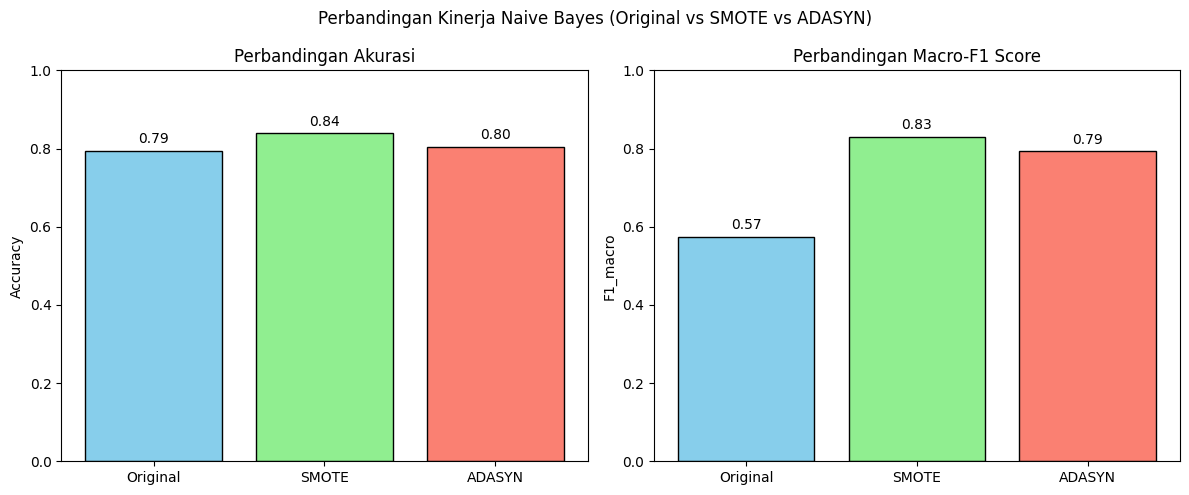

In [15]:
# Hitung Akurasi & F1-score
results = {
    "Original": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_macro": f1_score(y_test, y_pred, average="macro")
    },
    "SMOTE": {
        "Accuracy": accuracy_score(y_test_sm, y_pred_sm),
        "F1_macro": f1_score(y_test_sm, y_pred_sm, average="macro")
    },
    "ADASYN": {
        "Accuracy": accuracy_score(y_test_ad, y_pred_ad),
        "F1_macro": f1_score(y_test_ad, y_pred_ad, average="macro")
    }
}

# Cetak hasil dalam bentuk tabel
print("=== Perbandingan Akurasi & Macro-F1 Naive Bayes ===")
for k, v in results.items():
    print(f"{k}: Accuracy={v['Accuracy']:.4f}, F1_macro={v['F1_macro']:.4f}")

# Visualisasi Grafik Batang
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot Accuracy
axes[0].bar(results.keys(), [v["Accuracy"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[0].set_title("Perbandingan Akurasi")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
for i, v in enumerate([v["Accuracy"] for v in results.values()]):
    axes[0].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

# Plot Macro-F1
axes[1].bar(results.keys(), [v["F1_macro"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[1].set_title("Perbandingan Macro-F1 Score")
axes[1].set_ylabel("F1_macro")
axes[1].set_ylim(0, 1)
for i, v in enumerate([v["F1_macro"] for v in results.values()]):
    axes[1].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

plt.suptitle("Perbandingan Kinerja Naive Bayes (Original vs SMOTE vs ADASYN)")
plt.tight_layout()
plt.show()


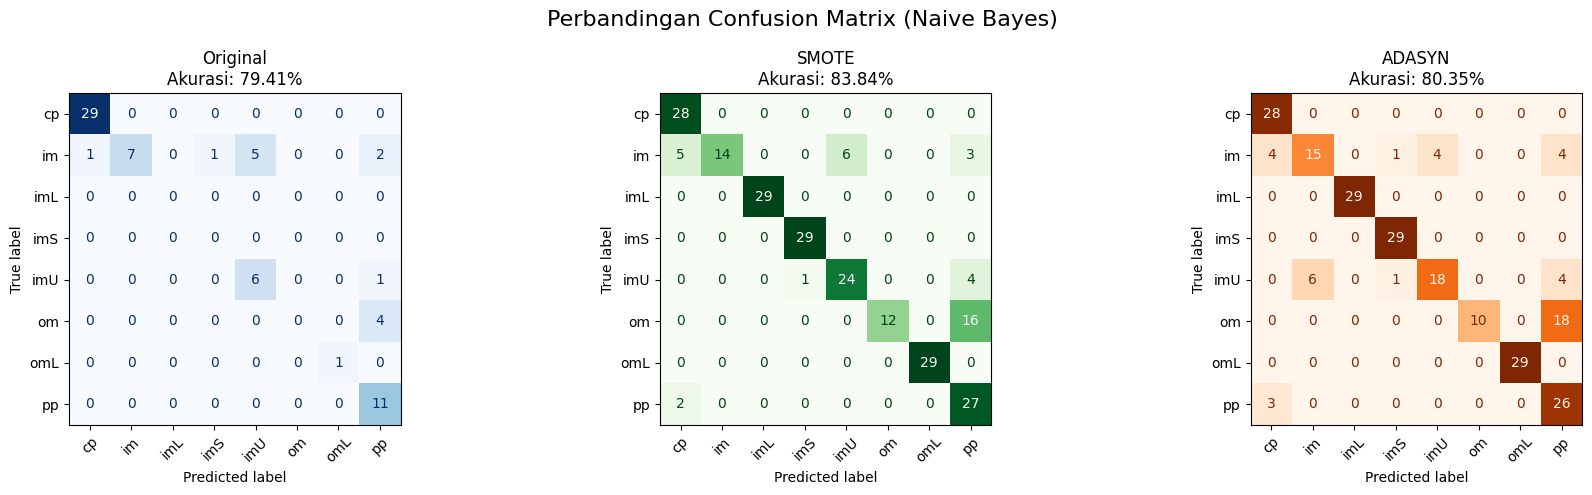


📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average):



,Accuracy,Precision,Recall,F1-Score
Original,0.7941,0.8173,0.7941,0.7685
SMOTE,0.8384,0.8877,0.8384,0.8309
ADASYN,0.8035,0.8461,0.8035,0.7943


In [16]:
# Hitung confusion matrix dan akurasi
cm_orig = confusion_matrix(y_test, y_pred, labels=np.unique(y_enc))
cm_sm   = confusion_matrix(y_test_sm, y_pred_sm, labels=np.unique(y_smote))
cm_ad   = confusion_matrix(y_test_ad, y_pred_ad, labels=np.unique(y_adasyn))

acc_orig = accuracy_score(y_test, y_pred)
acc_sm   = accuracy_score(y_test_sm, y_pred_sm)
acc_ad   = accuracy_score(y_test_ad, y_pred_ad)

# Plot confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Original
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_orig, display_labels=le.classes_)
disp1.plot(ax=axes[0], cmap="Blues", xticks_rotation=45, colorbar=False)
axes[0].set_title(f"Original\nAkurasi: {acc_orig:.2%}")

# SMOTE
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_sm, display_labels=le.classes_)
disp2.plot(ax=axes[1], cmap="Greens", xticks_rotation=45, colorbar=False)
axes[1].set_title(f"SMOTE\nAkurasi: {acc_sm:.2%}")

# ADASYN
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_ad, display_labels=le.classes_)
disp3.plot(ax=axes[2], cmap="Oranges", xticks_rotation=45, colorbar=False)
axes[2].set_title(f"ADASYN\nAkurasi: {acc_ad:.2%}")

plt.suptitle("Perbandingan Confusion Matrix (Naive Bayes)", fontsize=16)
plt.tight_layout()
plt.show()

# Tabel Perbandingan Metrik
report_orig = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_sm   = classification_report(y_test_sm, y_pred_sm, output_dict=True, zero_division=0)
report_ad   = classification_report(y_test_ad, y_pred_ad, output_dict=True, zero_division=0)

# Ambil hanya nilai rata-rata
metrics = pd.DataFrame({
    "Original": {
        "Accuracy": acc_orig,
        "Precision": report_orig["weighted avg"]["precision"],
        "Recall": report_orig["weighted avg"]["recall"],
        "F1-Score": report_orig["weighted avg"]["f1-score"]
    },
    "SMOTE": {
        "Accuracy": acc_sm,
        "Precision": report_sm["weighted avg"]["precision"],
        "Recall": report_sm["weighted avg"]["recall"],
        "F1-Score": report_sm["weighted avg"]["f1-score"]
    },
    "ADASYN": {
        "Accuracy": acc_ad,
        "Precision": report_ad["weighted avg"]["precision"],
        "Recall": report_ad["weighted avg"]["recall"],
        "F1-Score": report_ad["weighted avg"]["f1-score"]
    }
})

print("\n📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average):\n")
display(metrics.T.round(4))


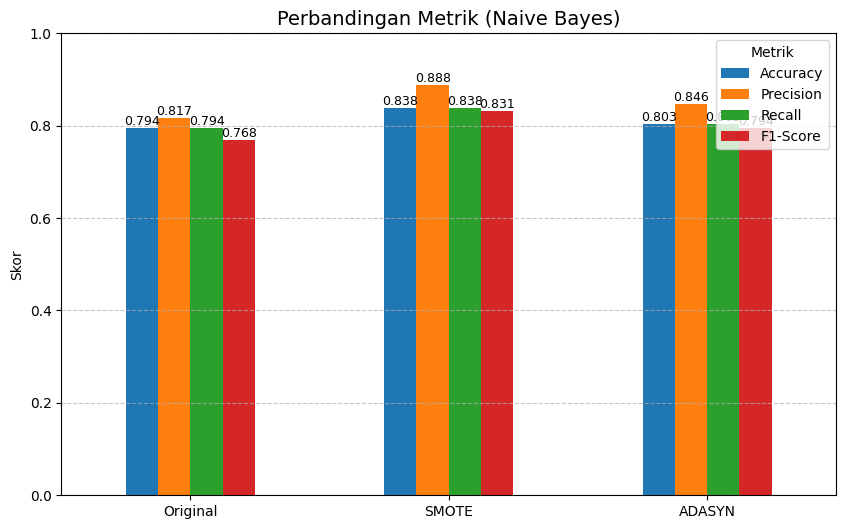

In [17]:
# Visualisasi Perbandingan Metrik dengan Angka
metrics_plot = metrics.T.round(4)

ax = metrics_plot.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Metrik (Naive Bayes)", fontsize=14)
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0,1)  # karena metrik nilainya antara 0-1
plt.legend(title="Metrik")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tambahkan angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", fontsize=9)

plt.show()

## Klasifikasi Dataset E-Coli Menggunakan Random Forest  

Import Library

In [18]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

Load & Preprocessing Data

In [19]:
# Membaca data
data = pd.read_csv("ecoli_dataset.csv")

# Pisahkan fitur dan target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. Data belum diseimbangkan (Original)

Split Data (80% Train, 20% Test)

In [20]:
# Split train & test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print(f"Jumlah Data Train: {len(X_train)} ({len(X_train)/len(X_scaled)*100:.2f}%)")
print(f"Jumlah Data Test : {len(X_test)} ({len(X_test)/len(X_scaled)*100:.2f}%)")

Jumlah Data Train: 268 (79.76%)
Jumlah Data Test : 68 (20.24%)


Random Forest

In [21]:
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_train, y_train)
y_pred_orig = rf_orig.predict(X_test)

Evaluasi

In [22]:
print("\n===== HASIL RANDOM FOREST (Original) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
print(classification_report(
    y_test, y_pred_orig,
    labels=np.unique(y_test),
    target_names=le.inverse_transform(np.unique(y_test))
))


===== HASIL RANDOM FOREST (Original) =====
Accuracy: 0.8676470588235294
              precision    recall  f1-score   support

          cp       0.94      1.00      0.97        29
          im       0.91      0.62      0.74        16
         imU       0.50      0.86      0.63         7
          om       1.00      1.00      1.00         4
         omL       1.00      1.00      1.00         1
          pp       1.00      0.82      0.90        11

    accuracy                           0.87        68
   macro avg       0.89      0.88      0.87        68
weighted avg       0.90      0.87      0.87        68



### 2. Data diseimbangkan menggunakan SMOTE  

SMOTE Balancing

In [23]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_res_smote, y_res_smote = smote.fit_resample(X_scaled, y_enc)

print("Distribusi SMOTE:", Counter(y_res_smote))

Distribusi SMOTE: Counter({0: 143, 1: 143, 3: 143, 2: 143, 4: 143, 5: 143, 6: 143, 7: 143})


Split Data (80% Train, 20% Test)

In [24]:
# Split train & test
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_res_smote, y_res_smote, test_size=0.2, random_state=42, stratify=y_res_smote
)

print(f"Jumlah Data Train: {len(X_train_sm)} ({len(X_train_sm)/len(X_res_smote)*100:.2f}%)")
print(f"Jumlah Data Test : {len(X_test_sm)} ({len(X_test_sm)/len(X_res_smote)*100:.2f}%)")

Jumlah Data Train: 915 (79.98%)
Jumlah Data Test : 229 (20.02%)


Random Forest

In [25]:
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)
y_pred_smote = rf_smote.predict(X_test_sm)

Evaluasi

In [26]:
print("\n===== HASIL RANDOM FOREST (SMOTE) =====")
print("Accuracy:", accuracy_score(y_test_sm, y_pred_smote))
print(classification_report(
    y_test_sm, y_pred_smote,
    labels=np.unique(y_test_sm),
    target_names=le.inverse_transform(np.unique(y_test_sm))
))


===== HASIL RANDOM FOREST (SMOTE) =====
Accuracy: 0.9519650655021834


              precision    recall  f1-score   support

          cp       0.88      1.00      0.93        28
          im       0.92      0.86      0.89        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        29
         imU       0.86      0.86      0.86        29
          om       1.00      0.96      0.98        28
         omL       1.00      1.00      1.00        29
          pp       0.96      0.93      0.95        29

    accuracy                           0.95       229
   macro avg       0.95      0.95      0.95       229
weighted avg       0.95      0.95      0.95       229



### 3. Data diseimbangkan menggunakan ADASYN  

ROS → ADASYN Balancing

In [27]:
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X_scaled, y_enc)

adasyn = ADASYN(random_state=42, n_neighbors=1)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_res_ros, y_res_ros)

print("Distribusi ADASYN:", Counter(y_res_adasyn))

Distribusi ADASYN: Counter({0: 143, 1: 143, 3: 143, 2: 143, 4: 143, 5: 143, 6: 143, 7: 143})


Split Data (80% Train, 20% Test)

In [28]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    X_res_adasyn, y_res_adasyn, test_size=0.2, random_state=42, stratify=y_res_adasyn
)

print(f"Jumlah Data Train: {len(X_train_ad)} ({len(X_train_ad)/len(X_res_adasyn)*100:.2f}%)")
print(f"Jumlah Data Test : {len(X_test_ad)} ({len(X_test_ad)/len(X_res_adasyn)*100:.2f}%)")

Jumlah Data Train: 915 (79.98%)
Jumlah Data Test : 229 (20.02%)


Random Forest

In [29]:
rf_adasyn = RandomForestClassifier(random_state=42)
rf_adasyn.fit(X_train_ad, y_train_ad)
y_pred_adasyn = rf_adasyn.predict(X_test_ad)

Evaluasi

In [30]:
print("\n===== HASIL RANDOM FOREST (ADASYN) =====")
print("Accuracy:", accuracy_score(y_test_ad, y_pred_adasyn))
print(classification_report(
    y_test_ad, y_pred_adasyn,
    labels=np.unique(y_test_ad),
    target_names=le.inverse_transform(np.unique(y_test_ad))
))


===== HASIL RANDOM FOREST (ADASYN) =====
Accuracy: 0.9912663755458515
              precision    recall  f1-score   support

          cp       0.97      1.00      0.98        28
          im       1.00      0.96      0.98        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        29
         imU       0.97      1.00      0.98        29
          om       1.00      1.00      1.00        28
         omL       1.00      1.00      1.00        29
          pp       1.00      0.97      0.98        29

    accuracy                           0.99       229
   macro avg       0.99      0.99      0.99       229
weighted avg       0.99      0.99      0.99       229



### Perbandingan dari ketiga kategori

=== Perbandingan Akurasi & Macro-F1 Random Forest ===
Original: Accuracy=0.8676, F1_macro=0.8732
SMOTE: Accuracy=0.9520, F1_macro=0.9517
ADASYN: Accuracy=0.9913, F1_macro=0.9912


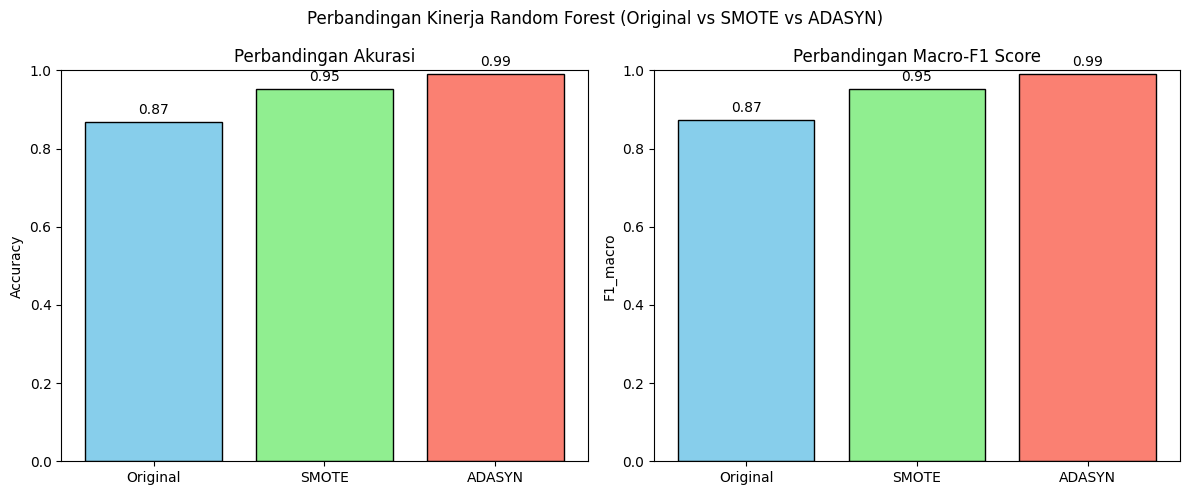

In [31]:
# Hitung Akurasi & F1-score
results = {
    "Original": {
        "Accuracy": accuracy_score(y_test, y_pred_orig),
        "F1_macro": f1_score(y_test, y_pred_orig, average="macro")
    },
    "SMOTE": {
        "Accuracy": accuracy_score(y_test_sm, y_pred_smote),
        "F1_macro": f1_score(y_test_sm, y_pred_smote, average="macro")
    },
    "ADASYN": {
        "Accuracy": accuracy_score(y_test_ad, y_pred_adasyn),
        "F1_macro": f1_score(y_test_ad, y_pred_adasyn, average="macro")
    }
}

# Cetak hasil dalam bentuk tabel
print("=== Perbandingan Akurasi & Macro-F1 Random Forest ===")
for k, v in results.items():
    print(f"{k}: Accuracy={v['Accuracy']:.4f}, F1_macro={v['F1_macro']:.4f}")

# Visualisasi Grafik Batang
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot Accuracy
axes[0].bar(results.keys(), [v["Accuracy"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[0].set_title("Perbandingan Akurasi")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
for i, v in enumerate([v["Accuracy"] for v in results.values()]):
    axes[0].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

# Plot Macro-F1
axes[1].bar(results.keys(), [v["F1_macro"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[1].set_title("Perbandingan Macro-F1 Score")
axes[1].set_ylabel("F1_macro")
axes[1].set_ylim(0, 1)
for i, v in enumerate([v["F1_macro"] for v in results.values()]):
    axes[1].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

plt.suptitle("Perbandingan Kinerja Random Forest (Original vs SMOTE vs ADASYN)")
plt.tight_layout()
plt.show()


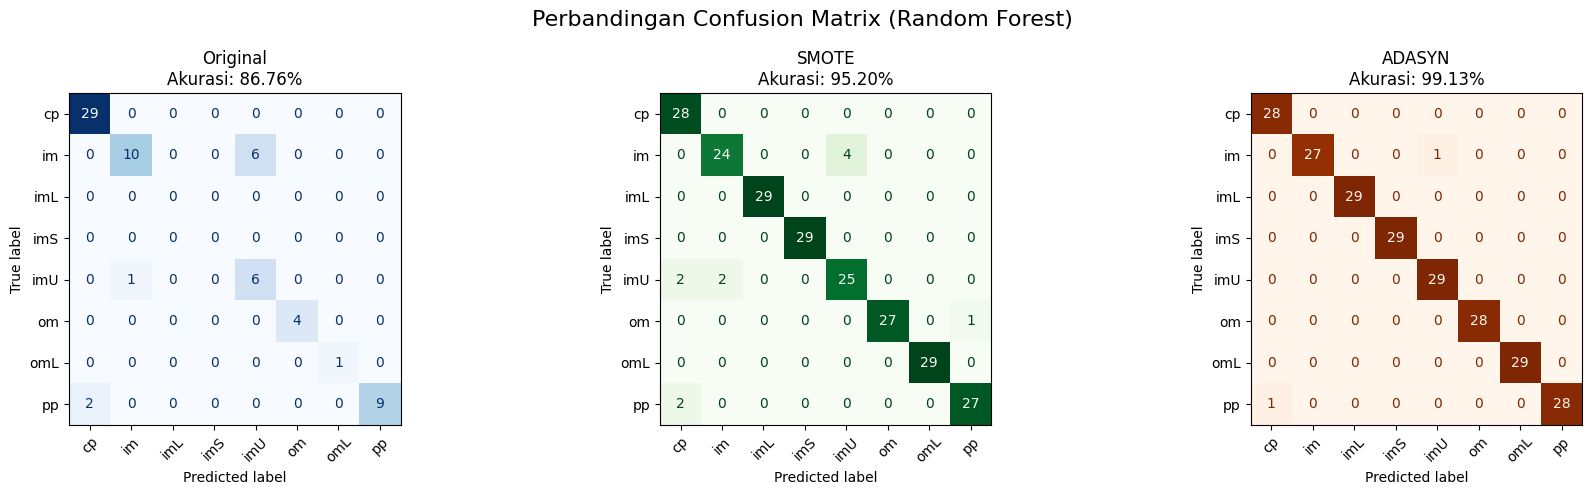


📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average) Random Forest:



,Accuracy,Precision,Recall,F1-Score
Original,0.8676,0.8996,0.8676,0.8707
SMOTE,0.9520,0.9533,0.9520,0.9519
ADASYN,0.9913,0.9916,0.9913,0.9913


In [32]:
# Confusion Matrix & Akurasi
cm_orig = confusion_matrix(y_test, y_pred_orig, labels=np.unique(y_enc))
cm_sm   = confusion_matrix(y_test_sm, y_pred_smote, labels=np.unique(y_smote))
cm_ad   = confusion_matrix(y_test_ad, y_pred_adasyn, labels=np.unique(y_adasyn))

acc_orig = accuracy_score(y_test, y_pred_orig)
acc_sm   = accuracy_score(y_test_sm, y_pred_smote)
acc_ad   = accuracy_score(y_test_ad, y_pred_adasyn)

# Plot confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Original
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_orig,
                               display_labels=le.inverse_transform(np.unique(y_enc)))
disp1.plot(ax=axes[0], cmap="Blues", xticks_rotation=45, colorbar=False)
axes[0].set_title(f"Original\nAkurasi: {acc_orig:.2%}")

# SMOTE
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_sm,
                               display_labels=le.inverse_transform(np.unique(y_smote)))
disp2.plot(ax=axes[1], cmap="Greens", xticks_rotation=45, colorbar=False)
axes[1].set_title(f"SMOTE\nAkurasi: {acc_sm:.2%}")

# ADASYN
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_ad,
                               display_labels=le.inverse_transform(np.unique(y_adasyn)))
disp3.plot(ax=axes[2], cmap="Oranges", xticks_rotation=45, colorbar=False)
axes[2].set_title(f"ADASYN\nAkurasi: {acc_ad:.2%}")

plt.suptitle("Perbandingan Confusion Matrix (Random Forest)", fontsize=16)
plt.tight_layout()
plt.show()

# Tabel Perbandingan Metrik
report_orig = classification_report(y_test, y_pred_orig, output_dict=True, zero_division=0)
report_sm   = classification_report(y_test_sm, y_pred_smote, output_dict=True, zero_division=0)
report_ad   = classification_report(y_test_ad, y_pred_adasyn, output_dict=True, zero_division=0)

# Ambil hanya nilai rata-rata (weighted avg)
metrics = pd.DataFrame({
    "Original": {
        "Accuracy": acc_orig,
        "Precision": report_orig["weighted avg"]["precision"],
        "Recall": report_orig["weighted avg"]["recall"],
        "F1-Score": report_orig["weighted avg"]["f1-score"]
    },
    "SMOTE": {
        "Accuracy": acc_sm,
        "Precision": report_sm["weighted avg"]["precision"],
        "Recall": report_sm["weighted avg"]["recall"],
        "F1-Score": report_sm["weighted avg"]["f1-score"]
    },
    "ADASYN": {
        "Accuracy": acc_ad,
        "Precision": report_ad["weighted avg"]["precision"],
        "Recall": report_ad["weighted avg"]["recall"],
        "F1-Score": report_ad["weighted avg"]["f1-score"]
    }
})

print("\n📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average) Random Forest:\n")
display(metrics.T.round(4))


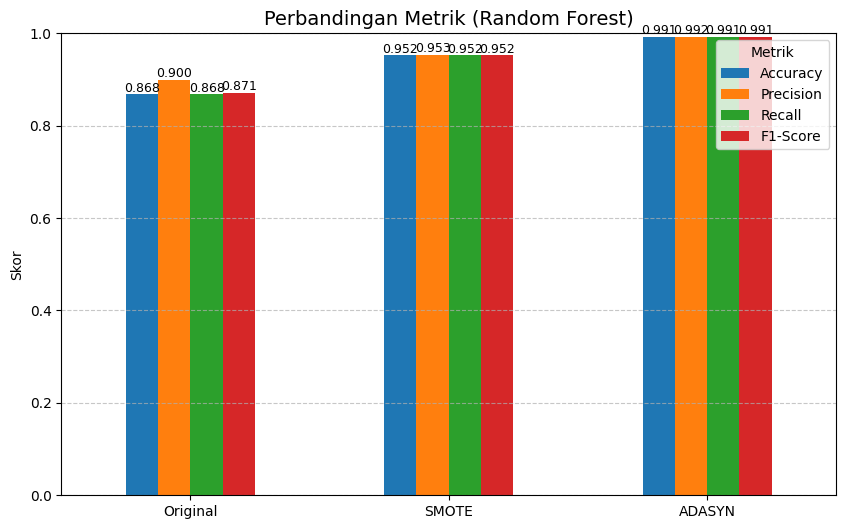

In [33]:
# Visualisasi Perbandingan Metrik
metrics_plot = metrics.T.round(4)

ax = metrics_plot.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Metrik (Random Forest)", fontsize=14)
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0,1)  # karena metrik nilainya antara 0-1
plt.legend(title="Metrik")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tambahkan angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", fontsize=9)

plt.show()


## Perbandingan Tiap Model Klasifikasi  

### Perbandingan Klasifikasi Naive Bayes

=== Perbandingan Akurasi & Macro-F1 Naive Bayes ===
Original: Accuracy=0.7941, F1_macro=0.5739
SMOTE: Accuracy=0.8384, F1_macro=0.8295
ADASYN: Accuracy=0.8035, F1_macro=0.7927


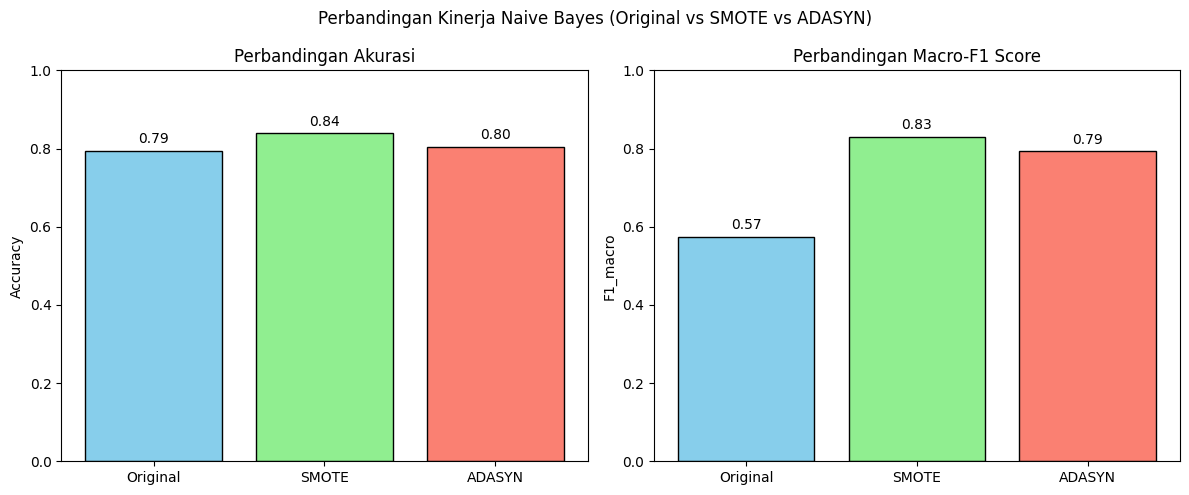

In [34]:
# Hitung Akurasi & F1-score
results = {
    "Original": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_macro": f1_score(y_test, y_pred, average="macro")
    },
    "SMOTE": {
        "Accuracy": accuracy_score(y_test_sm, y_pred_sm),
        "F1_macro": f1_score(y_test_sm, y_pred_sm, average="macro")
    },
    "ADASYN": {
        "Accuracy": accuracy_score(y_test_ad, y_pred_ad),
        "F1_macro": f1_score(y_test_ad, y_pred_ad, average="macro")
    }
}

# Cetak hasil dalam bentuk tabel
print("=== Perbandingan Akurasi & Macro-F1 Naive Bayes ===")
for k, v in results.items():
    print(f"{k}: Accuracy={v['Accuracy']:.4f}, F1_macro={v['F1_macro']:.4f}")

# Visualisasi Grafik Batang
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot Accuracy
axes[0].bar(results.keys(), [v["Accuracy"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[0].set_title("Perbandingan Akurasi")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
for i, v in enumerate([v["Accuracy"] for v in results.values()]):
    axes[0].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

# Plot Macro-F1
axes[1].bar(results.keys(), [v["F1_macro"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[1].set_title("Perbandingan Macro-F1 Score")
axes[1].set_ylabel("F1_macro")
axes[1].set_ylim(0, 1)
for i, v in enumerate([v["F1_macro"] for v in results.values()]):
    axes[1].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

plt.suptitle("Perbandingan Kinerja Naive Bayes (Original vs SMOTE vs ADASYN)")
plt.tight_layout()
plt.show()


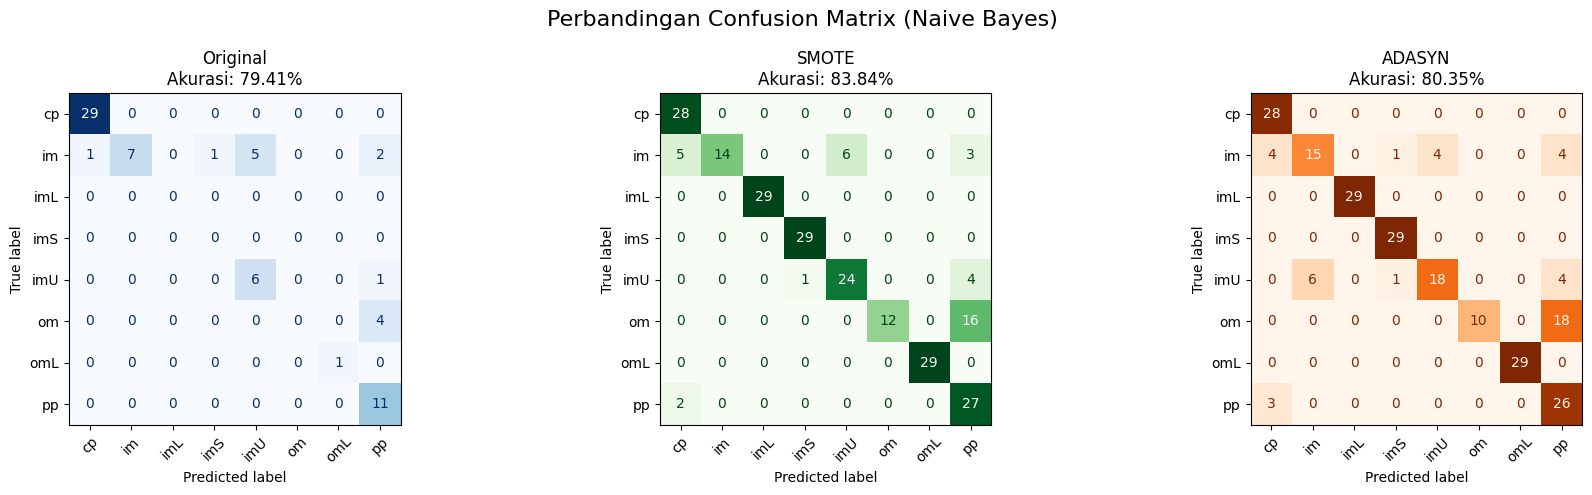


📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average):



,Accuracy,Precision,Recall,F1-Score
Original,0.7941,0.8173,0.7941,0.7685
SMOTE,0.8384,0.8877,0.8384,0.8309
ADASYN,0.8035,0.8461,0.8035,0.7943


In [35]:
# Hitung confusion matrix dan akurasi
cm_orig = confusion_matrix(y_test, y_pred, labels=np.unique(y_enc))
cm_sm   = confusion_matrix(y_test_sm, y_pred_sm, labels=np.unique(y_smote))
cm_ad   = confusion_matrix(y_test_ad, y_pred_ad, labels=np.unique(y_adasyn))

acc_orig = accuracy_score(y_test, y_pred)
acc_sm   = accuracy_score(y_test_sm, y_pred_sm)
acc_ad   = accuracy_score(y_test_ad, y_pred_ad)

# Plot confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Original
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_orig, display_labels=le.classes_)
disp1.plot(ax=axes[0], cmap="Blues", xticks_rotation=45, colorbar=False)
axes[0].set_title(f"Original\nAkurasi: {acc_orig:.2%}")

# SMOTE
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_sm, display_labels=le.classes_)
disp2.plot(ax=axes[1], cmap="Greens", xticks_rotation=45, colorbar=False)
axes[1].set_title(f"SMOTE\nAkurasi: {acc_sm:.2%}")

# ADASYN
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_ad, display_labels=le.classes_)
disp3.plot(ax=axes[2], cmap="Oranges", xticks_rotation=45, colorbar=False)
axes[2].set_title(f"ADASYN\nAkurasi: {acc_ad:.2%}")

plt.suptitle("Perbandingan Confusion Matrix (Naive Bayes)", fontsize=16)
plt.tight_layout()
plt.show()

# Tabel Perbandingan Metrik
report_orig = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_sm   = classification_report(y_test_sm, y_pred_sm, output_dict=True, zero_division=0)
report_ad   = classification_report(y_test_ad, y_pred_ad, output_dict=True, zero_division=0)

# Ambil hanya nilai rata-rata
metrics = pd.DataFrame({
    "Original": {
        "Accuracy": acc_orig,
        "Precision": report_orig["weighted avg"]["precision"],
        "Recall": report_orig["weighted avg"]["recall"],
        "F1-Score": report_orig["weighted avg"]["f1-score"]
    },
    "SMOTE": {
        "Accuracy": acc_sm,
        "Precision": report_sm["weighted avg"]["precision"],
        "Recall": report_sm["weighted avg"]["recall"],
        "F1-Score": report_sm["weighted avg"]["f1-score"]
    },
    "ADASYN": {
        "Accuracy": acc_ad,
        "Precision": report_ad["weighted avg"]["precision"],
        "Recall": report_ad["weighted avg"]["recall"],
        "F1-Score": report_ad["weighted avg"]["f1-score"]
    }
})

print("\n📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average):\n")
display(metrics.T.round(4))


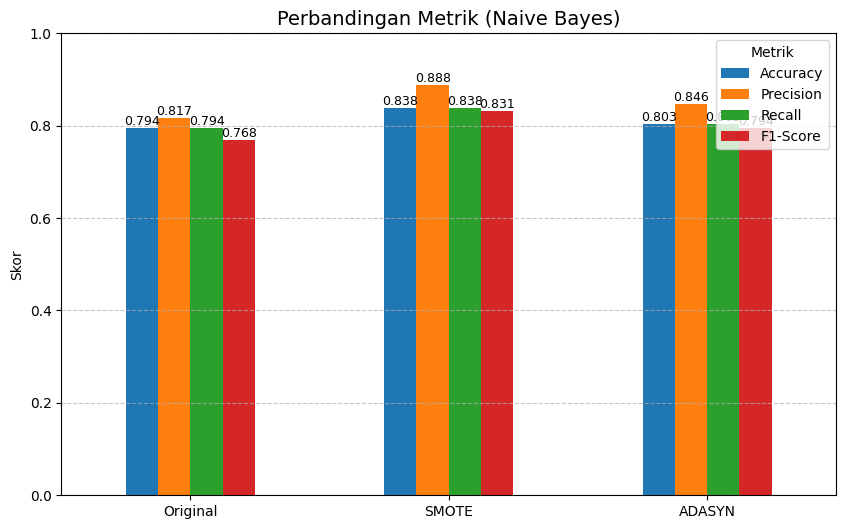

In [36]:
# Visualisasi Perbandingan Metrik dengan Angka
metrics_plot = metrics.T.round(4)

ax = metrics_plot.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Metrik (Naive Bayes)", fontsize=14)
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0,1)  # karena metrik nilainya antara 0-1
plt.legend(title="Metrik")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tambahkan angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", fontsize=9)

plt.show()

### Perbandingan Klasifikasi Random Forest

=== Perbandingan Akurasi & Macro-F1 Random Forest ===
Original: Accuracy=0.8676, F1_macro=0.8732
SMOTE: Accuracy=0.9520, F1_macro=0.9517
ADASYN: Accuracy=0.9913, F1_macro=0.9912


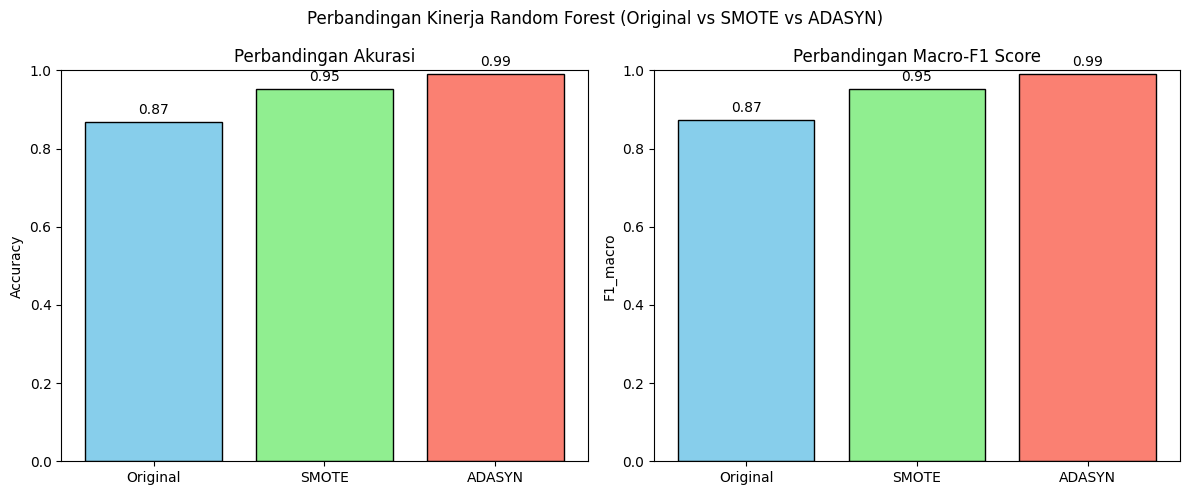

In [37]:
# Hitung Akurasi & F1-score
results = {
    "Original": {
        "Accuracy": accuracy_score(y_test, y_pred_orig),
        "F1_macro": f1_score(y_test, y_pred_orig, average="macro")
    },
    "SMOTE": {
        "Accuracy": accuracy_score(y_test_sm, y_pred_smote),
        "F1_macro": f1_score(y_test_sm, y_pred_smote, average="macro")
    },
    "ADASYN": {
        "Accuracy": accuracy_score(y_test_ad, y_pred_adasyn),
        "F1_macro": f1_score(y_test_ad, y_pred_adasyn, average="macro")
    }
}

# Cetak hasil dalam bentuk tabel
print("=== Perbandingan Akurasi & Macro-F1 Random Forest ===")
for k, v in results.items():
    print(f"{k}: Accuracy={v['Accuracy']:.4f}, F1_macro={v['F1_macro']:.4f}")

# Visualisasi Grafik Batang
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot Accuracy
axes[0].bar(results.keys(), [v["Accuracy"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[0].set_title("Perbandingan Akurasi")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
for i, v in enumerate([v["Accuracy"] for v in results.values()]):
    axes[0].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

# Plot Macro-F1
axes[1].bar(results.keys(), [v["F1_macro"] for v in results.values()],
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
axes[1].set_title("Perbandingan Macro-F1 Score")
axes[1].set_ylabel("F1_macro")
axes[1].set_ylim(0, 1)
for i, v in enumerate([v["F1_macro"] for v in results.values()]):
    axes[1].text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

plt.suptitle("Perbandingan Kinerja Random Forest (Original vs SMOTE vs ADASYN)")
plt.tight_layout()
plt.show()


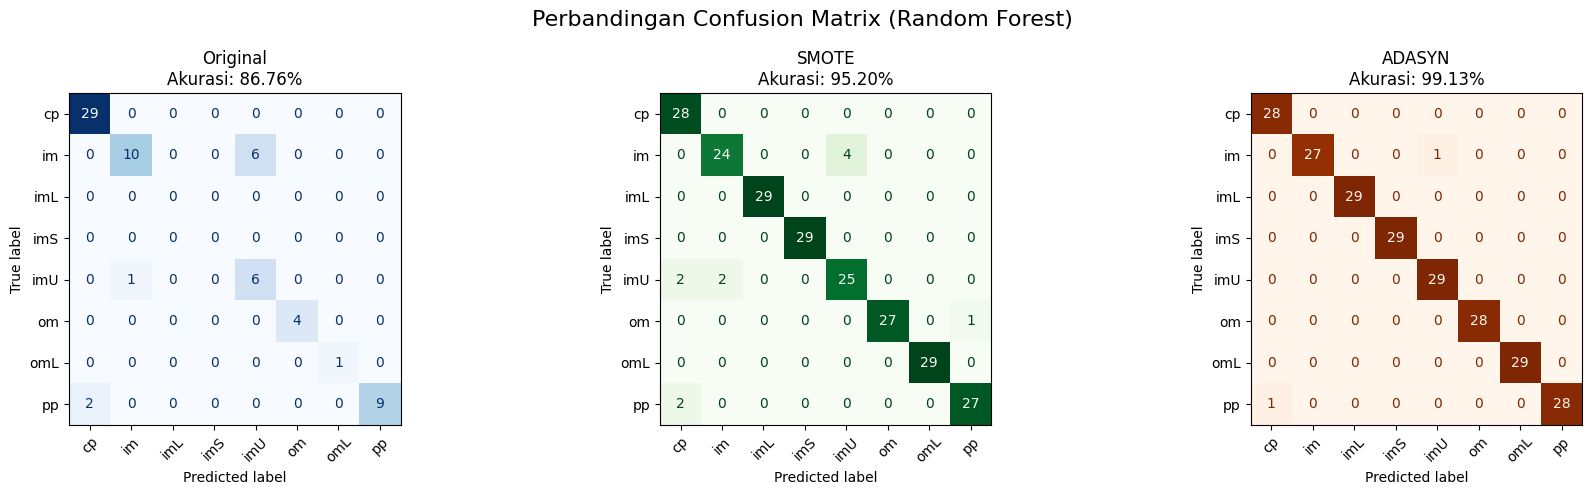


📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average) Random Forest:



,Accuracy,Precision,Recall,F1-Score
Original,0.8676,0.8996,0.8676,0.8707
SMOTE,0.9520,0.9533,0.9520,0.9519
ADASYN,0.9913,0.9916,0.9913,0.9913


In [38]:
# Confusion Matrix & Akurasi
cm_orig = confusion_matrix(y_test, y_pred_orig, labels=np.unique(y_enc))
cm_sm   = confusion_matrix(y_test_sm, y_pred_smote, labels=np.unique(y_smote))
cm_ad   = confusion_matrix(y_test_ad, y_pred_adasyn, labels=np.unique(y_adasyn))

acc_orig = accuracy_score(y_test, y_pred_orig)
acc_sm   = accuracy_score(y_test_sm, y_pred_smote)
acc_ad   = accuracy_score(y_test_ad, y_pred_adasyn)

# Plot confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Original
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_orig,
                               display_labels=le.inverse_transform(np.unique(y_enc)))
disp1.plot(ax=axes[0], cmap="Blues", xticks_rotation=45, colorbar=False)
axes[0].set_title(f"Original\nAkurasi: {acc_orig:.2%}")

# SMOTE
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_sm,
                               display_labels=le.inverse_transform(np.unique(y_smote)))
disp2.plot(ax=axes[1], cmap="Greens", xticks_rotation=45, colorbar=False)
axes[1].set_title(f"SMOTE\nAkurasi: {acc_sm:.2%}")

# ADASYN
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_ad,
                               display_labels=le.inverse_transform(np.unique(y_adasyn)))
disp3.plot(ax=axes[2], cmap="Oranges", xticks_rotation=45, colorbar=False)
axes[2].set_title(f"ADASYN\nAkurasi: {acc_ad:.2%}")

plt.suptitle("Perbandingan Confusion Matrix (Random Forest)", fontsize=16)
plt.tight_layout()
plt.show()

# Tabel Perbandingan Metrik
report_orig = classification_report(y_test, y_pred_orig, output_dict=True, zero_division=0)
report_sm   = classification_report(y_test_sm, y_pred_smote, output_dict=True, zero_division=0)
report_ad   = classification_report(y_test_ad, y_pred_adasyn, output_dict=True, zero_division=0)

# Ambil hanya nilai rata-rata (weighted avg)
metrics = pd.DataFrame({
    "Original": {
        "Accuracy": acc_orig,
        "Precision": report_orig["weighted avg"]["precision"],
        "Recall": report_orig["weighted avg"]["recall"],
        "F1-Score": report_orig["weighted avg"]["f1-score"]
    },
    "SMOTE": {
        "Accuracy": acc_sm,
        "Precision": report_sm["weighted avg"]["precision"],
        "Recall": report_sm["weighted avg"]["recall"],
        "F1-Score": report_sm["weighted avg"]["f1-score"]
    },
    "ADASYN": {
        "Accuracy": acc_ad,
        "Precision": report_ad["weighted avg"]["precision"],
        "Recall": report_ad["weighted avg"]["recall"],
        "F1-Score": report_ad["weighted avg"]["f1-score"]
    }
})

print("\n📊 Perbandingan Akurasi, Precision, Recall, F1-Score (Weighted Average) Random Forest:\n")
display(metrics.T.round(4))


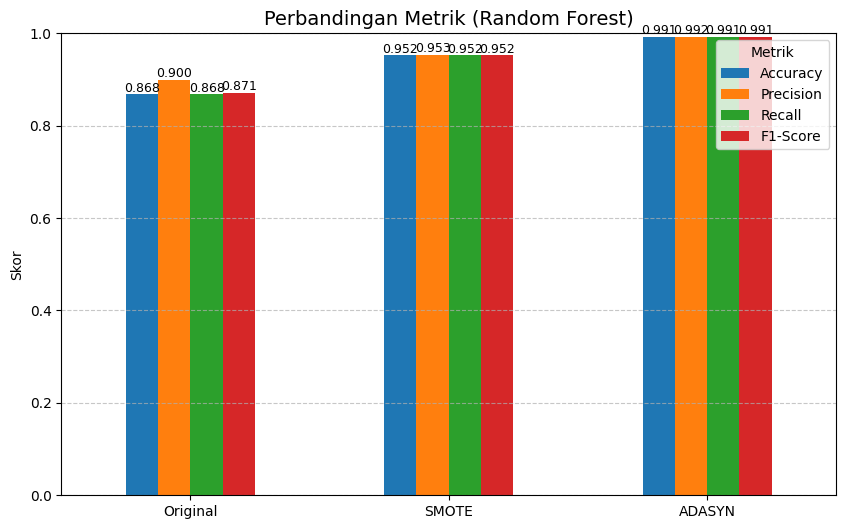

In [39]:
# Visualisasi Perbandingan Metrik
metrics_plot = metrics.T.round(4)

ax = metrics_plot.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Metrik (Random Forest)", fontsize=14)
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0,1)  # karena metrik nilainya antara 0-1
plt.legend(title="Metrik")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tambahkan angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", fontsize=9)

plt.show()